# Team Members
Team Name - Team Seven
1. Reezwan Ul Haq Mohammad - rmoham27@uic.edu
2. Sai Anish Garapati - sgarap2@uic.edu
3. Vamsi Krishna Mandalapu - vmanda8@uic.edu

Project Name - Crash Prediction in Chicago

# Problem
The main idea of this project is to build predictive model that can tell us the primary reason for a crash given certain attributes which would help us to analyze the reasons that could lead to crash based on the primary crash reason.
Using the crash dataset we are also trying to get the number of injuries that could occur in a crash based on the type of crash and other set of features.
The model can also predict the fatality of crash based on the age and gender of person involved in the crash and type of crash.

Why is this important :
There were more than 30,000 crashes in US last year out of which almost 10,000 crashes were fatal and involved serious injuries. As Chicago is a bicycle friendly city, these kind of predictions will help people to be more alert in areas where the number of crashes are high and dangerous crashes have occurred previously.

# Research Question - Team Member 1
Q) Can we predict the primary cause of crash based on the vehicle type, crash time and weather conditions?

# Research Question - Team Member 2
Q) Can we predict the number of injuries that could occur in a crash based on crash hour, weather conditions and other features ?

# Research Question - Team Member 3
Q) How are the attributes age and gender used to determine the injury severity ?

# Data
We are using 3 different datasets which are crashes dataset, vehicle dataset and people dataset. These datasets have the details of a crash occurred, vehicles involved in the crash and people invloved in the crash.
There are 700k rows with 49 columns of data in Crash Dataset.
Original size of vehicle dataset is 780 MB which has 1.5 million rows with 71 columns.
The people dataset contains information about people involved in a crash and if any injuries were sustained.
We are using the crash id which is contained in all the datasets to map them where if two or more vehicles are included in a crash, we pick the vehicle which is the reason for the crash.
Source

Crashes Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Vehicle Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

People Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d


# Data Cleaning - Team Member 1
Initially there were 1.5 million rows in the vehicle dataset and 71 columns out of which a lot of columns were redundant and would not be useful to build our model. So we have removed those columns and only included whichever are useful.
We came up with 11 columns at the end which has decreased the data size from 780MB to 100MB. 
Rows containing null values in crash id and vehicle id are removed and remaining columns are filled with their mean or mode.
There were outliers in number of passengers and vehicle year which are eliminated.
The final vehicle dataset has 634123 rows which will be further reduced once it is joined with people dataset and the crash dataset.  Label Encoder is used to assign numerical values to the category to create the prediction models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# from mlxtend.evaluate import feature_importance_permutation

In [3]:
#Get vehicle dataset and crash dataset from drive
ve_data = pd.read_csv('Crashes-Vehicles.csv', low_memory=False)
vehicles_data = pd.read_csv('Crashes-Crashes.csv', low_memory=False)

In [4]:
#Drop redundant columns which are not necessary
v_data = ve_data.drop(ve_data.columns[[0, 2, 4, 8, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]], axis=1)
v_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587149 entries, 0 to 1587148
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CRASH_RECORD_ID   1587149 non-null  object 
 1   CRASH_DATE        1587149 non-null  object 
 2   UNIT_TYPE         1585067 non-null  object 
 3   NUM_PASSENGERS    234865 non-null   float64
 4   VEHICLE_ID        1550830 non-null  float64
 5   MAKE              1550825 non-null  object 
 6   LIC_PLATE_STATE   1408968 non-null  object 
 7   VEHICLE_YEAR      1300486 non-null  float64
 8   VEHICLE_DEFECT    1550830 non-null  object 
 9   VEHICLE_USE       1550830 non-null  object 
 10  TRAVEL_DIRECTION  1550830 non-null  object 
dtypes: float64(3), object(8)
memory usage: 133.2+ MB


In [5]:
#Drop all NA and fill the other unknown values with mode and 0 values with mean
v_data.dropna(subset = ['CRASH_RECORD_ID', 'CRASH_DATE', 'VEHICLE_ID'],inplace = True)
v_data['UNIT_TYPE'].fillna(value = v_data['UNIT_TYPE'].mode()[0], inplace = True)
v_data['NUM_PASSENGERS'].fillna(value = v_data['NUM_PASSENGERS'].mean(), inplace = True)
v_data['MAKE'].fillna(value = v_data['MAKE'].mode()[0], inplace = True)
v_data['LIC_PLATE_STATE'].fillna(value = v_data['LIC_PLATE_STATE'].mode()[0], inplace = True)
v_data['VEHICLE_YEAR'].fillna(value = v_data['VEHICLE_YEAR'].mean(), inplace = True)
v_data['VEHICLE_DEFECT'].fillna(value = v_data['VEHICLE_DEFECT'].mode()[0], inplace = True)
v_data['VEHICLE_USE'].fillna(value = v_data['VEHICLE_USE'].mode()[0], inplace = True)
v_data['TRAVEL_DIRECTION'].fillna(value = v_data['TRAVEL_DIRECTION'].mode()[0], inplace = True)
v_data.head()

,CRASH_RECORD_ID,CRASH_DATE,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_USE,TRAVEL_DIRECTION
0,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,04/14/2023 02:05:00 PM,DRIVER,1.471714,1478881.0,FORD,IL,2020.0,UNKNOWN,OTHER,S
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,DRIVER,1.471714,834816.0,HONDA,IL,2016.0,UNKNOWN,PERSONAL,N
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.471714,834819.0,TOYOTA,IL,2010.0,NONE,PERSONAL,N
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.471714,834817.0,GENERAL MOTORS CORPORATION (GMC),IL,2008.0,UNKNOWN,UNKNOWN/NA,N
4,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,04/14/2023 02:05:00 PM,DRIVER,1.000000,1478892.0,ISUZU,IL,2018.0,UNKNOWN,OTHER,S


CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int64
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR        float64
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


(0.0, 10.0)

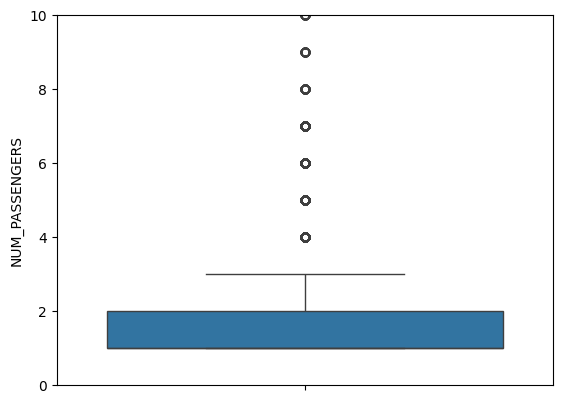

In [6]:
#Draw box plots for different features and remove the rows which are outliers
v_data = v_data.astype({'NUM_PASSENGERS':'int'})
print(v_data.dtypes)
a = sns.boxplot(ve_data['NUM_PASSENGERS'])
a.set_ylim(0,10)

375


<Axes: ylabel='VEHICLE_YEAR'>

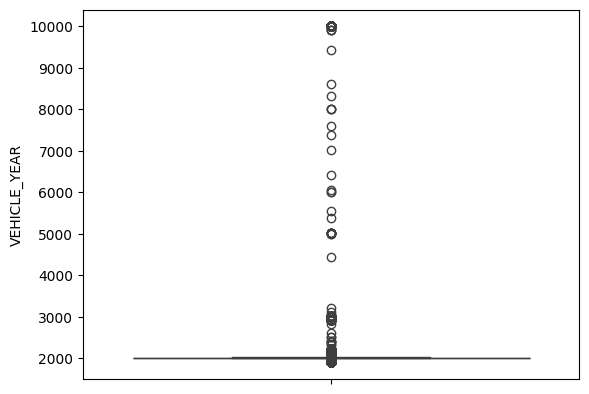

In [7]:
ind = v_data[(v_data['NUM_PASSENGERS'] > 8)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
v_data = v_data.astype({'LIC_PLATE_STATE':'str'})
sns.boxplot(ve_data['VEHICLE_YEAR'])

1463
367


<Axes: ylabel='VEHICLE_YEAR'>

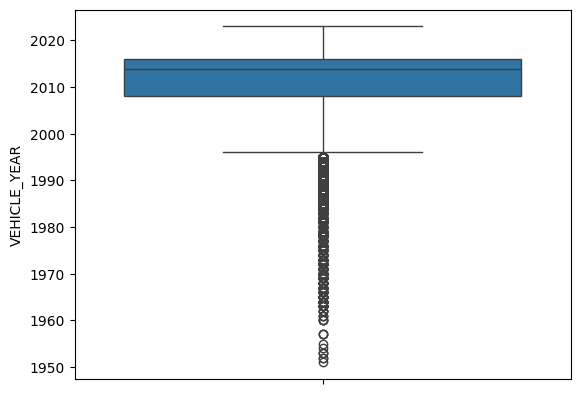

In [8]:
ind = v_data[(v_data['VEHICLE_YEAR'] > 2023)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
ind = v_data[(v_data['VEHICLE_YEAR'] < 1950)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

50100


<Axes: ylabel='VEHICLE_YEAR'>

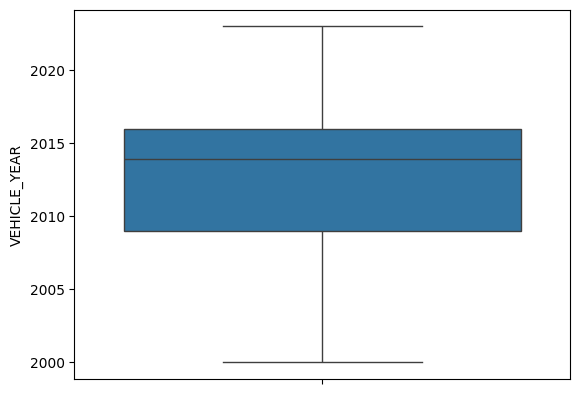

In [9]:
ind = v_data[(v_data['VEHICLE_YEAR'] < 2000)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

In [10]:
vehicles_data

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,JG412655,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,JG434996,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,JG361138,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,JG376618,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,JG387648,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777958,7100975b248ca3a09078c78c90cecf6ccd6be4a7915952...,JG469677,NaN,10/17/2023 11:58:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,11,3,10,41.767284,-87.621978,POINT (-87.621978182267 41.767284301708)
777959,7cb67bfcb4d68e0dd48367a2ff938e3242923c835e8f05...,JG468544,NaN,10/18/2023 11:50:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,1.0,0.0,11,4,10,42.010575,-87.816251,POINT (-87.816251139383 42.010575059576)
777960,edd2f774156e1119f03dda4a5036475f77faee775f27e7...,JG465895,NaN,10/16/2023 11:00:00 AM,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,11,2,10,41.696233,-87.595806,POINT (-87.59580619714 41.696232527674)
777961,4d25e7ff14d3acd319b6d1be86130619ea04cd92e6fc20...,JG470604,NaN,10/19/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,1.0,0.0,1.0,0.0,13,5,10,41.865979,-87.744610,POINT (-87.744609883514 41.865979486289)


In [10]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698148 entries, 0 to 698147
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                698148 non-null  object 
 1   RD_NO                          694074 non-null  object 
 2   CRASH_DATE_EST_I               52910 non-null   object 
 3   CRASH_DATE                     698148 non-null  object 
 4   POSTED_SPEED_LIMIT             698148 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         698148 non-null  object 
 6   DEVICE_CONDITION               698148 non-null  object 
 7   WEATHER_CONDITION              698148 non-null  object 
 8   LIGHTING_CONDITION             698148 non-null  object 
 9   FIRST_CRASH_TYPE               698148 non-null  object 
 10  TRAFFICWAY_TYPE                698148 non-null  object 
 11  LANE_CNT                       198998 non-null  float64
 12  ALIGNMENT                     

In [4]:
#Remove redundant columns
vehicles_data = vehicles_data.drop(vehicles_data.columns[[1, 2, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 46, 47, 48]], axis=1)
vehicles_data

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,3.0,19,3,9
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY,0.0,18,6,9
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,FAILING TO REDUCE SPEED TO AVOID CRASH,0.0,14,7,7
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,0.0,23,4,8
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,FOLLOWING TOO CLOSELY,1.0,12,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777958,7100975b248ca3a09078c78c90cecf6ccd6be4a7915952...,10/17/2023 11:58:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,3,10
777959,7cb67bfcb4d68e0dd48367a2ff938e3242923c835e8f05...,10/18/2023 11:50:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,4,10
777960,edd2f774156e1119f03dda4a5036475f77faee775f27e7...,10/16/2023 11:00:00 AM,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,11,2,10
777961,4d25e7ff14d3acd319b6d1be86130619ea04cd92e6fc20...,10/19/2023 01:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,IMPROPER TURNING/NO SIGNAL,1.0,13,5,10


In [12]:
#cleaned dataset
path2 = os.path.join('C:' + os.sep, 'Users', 'NAYEEM AKHTER', 'Desktop', 'UIC', 'CS 418', 'Project', 'Traffic_Crashes-Vehicles_cleaned.csv')
vehicles_data.to_csv(path2)

In [5]:
#Encode the features with labels
text_col = ['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL']
c_data = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    c_data[col] = encoder.fit_transform(vehicles_data[col])
    
c_data

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL
0,16,1,2,4,0,36,3
1,4,3,2,1,1,19,0
2,16,1,2,3,1,17,0
3,4,3,2,1,1,18,0
4,6,1,2,3,0,19,1
...,...,...,...,...,...,...,...
777958,4,3,11,3,1,36,0
777959,4,3,2,3,1,36,0
777960,4,3,2,3,1,36,0
777961,16,1,2,3,0,24,1


In [6]:
#Get the columns which are necessary
col = ['CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH']
cn_data = pd.DataFrame(vehicles_data[col])
cn_data

,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,09/05/2023 07:05:00 PM,30,19,3,9
1,09/22/2023 06:45:00 PM,50,18,6,9
2,07/29/2023 02:45:00 PM,30,14,7,7
3,08/09/2023 11:00:00 PM,30,23,4,8
4,08/18/2023 12:50:00 PM,15,12,6,8
...,...,...,...,...,...
777958,10/17/2023 11:58:00 AM,25,11,3,10
777959,10/18/2023 11:50:00 AM,25,11,4,10
777960,10/16/2023 11:00:00 AM,5,11,2,10
777961,10/19/2023 01:00:00 PM,30,13,5,10


In [7]:
#Merge multiple features into a dataframe
df = pd.merge(c_data, cn_data, left_index=True, right_index=True)
df.dropna
df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,16,1,2,4,0,36,3,09/05/2023 07:05:00 PM,30,19,3,9
1,4,3,2,1,1,19,0,09/22/2023 06:45:00 PM,50,18,6,9
2,16,1,2,3,1,17,0,07/29/2023 02:45:00 PM,30,14,7,7
3,4,3,2,1,1,18,0,08/09/2023 11:00:00 PM,30,23,4,8
4,6,1,2,3,0,19,1,08/18/2023 12:50:00 PM,15,12,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...
777958,4,3,11,3,1,36,0,10/17/2023 11:58:00 AM,25,11,3,10
777959,4,3,2,3,1,36,0,10/18/2023 11:50:00 AM,25,11,4,10
777960,4,3,2,3,1,36,0,10/16/2023 11:00:00 AM,5,11,2,10
777961,16,1,2,3,0,24,1,10/19/2023 01:00:00 PM,30,13,5,10


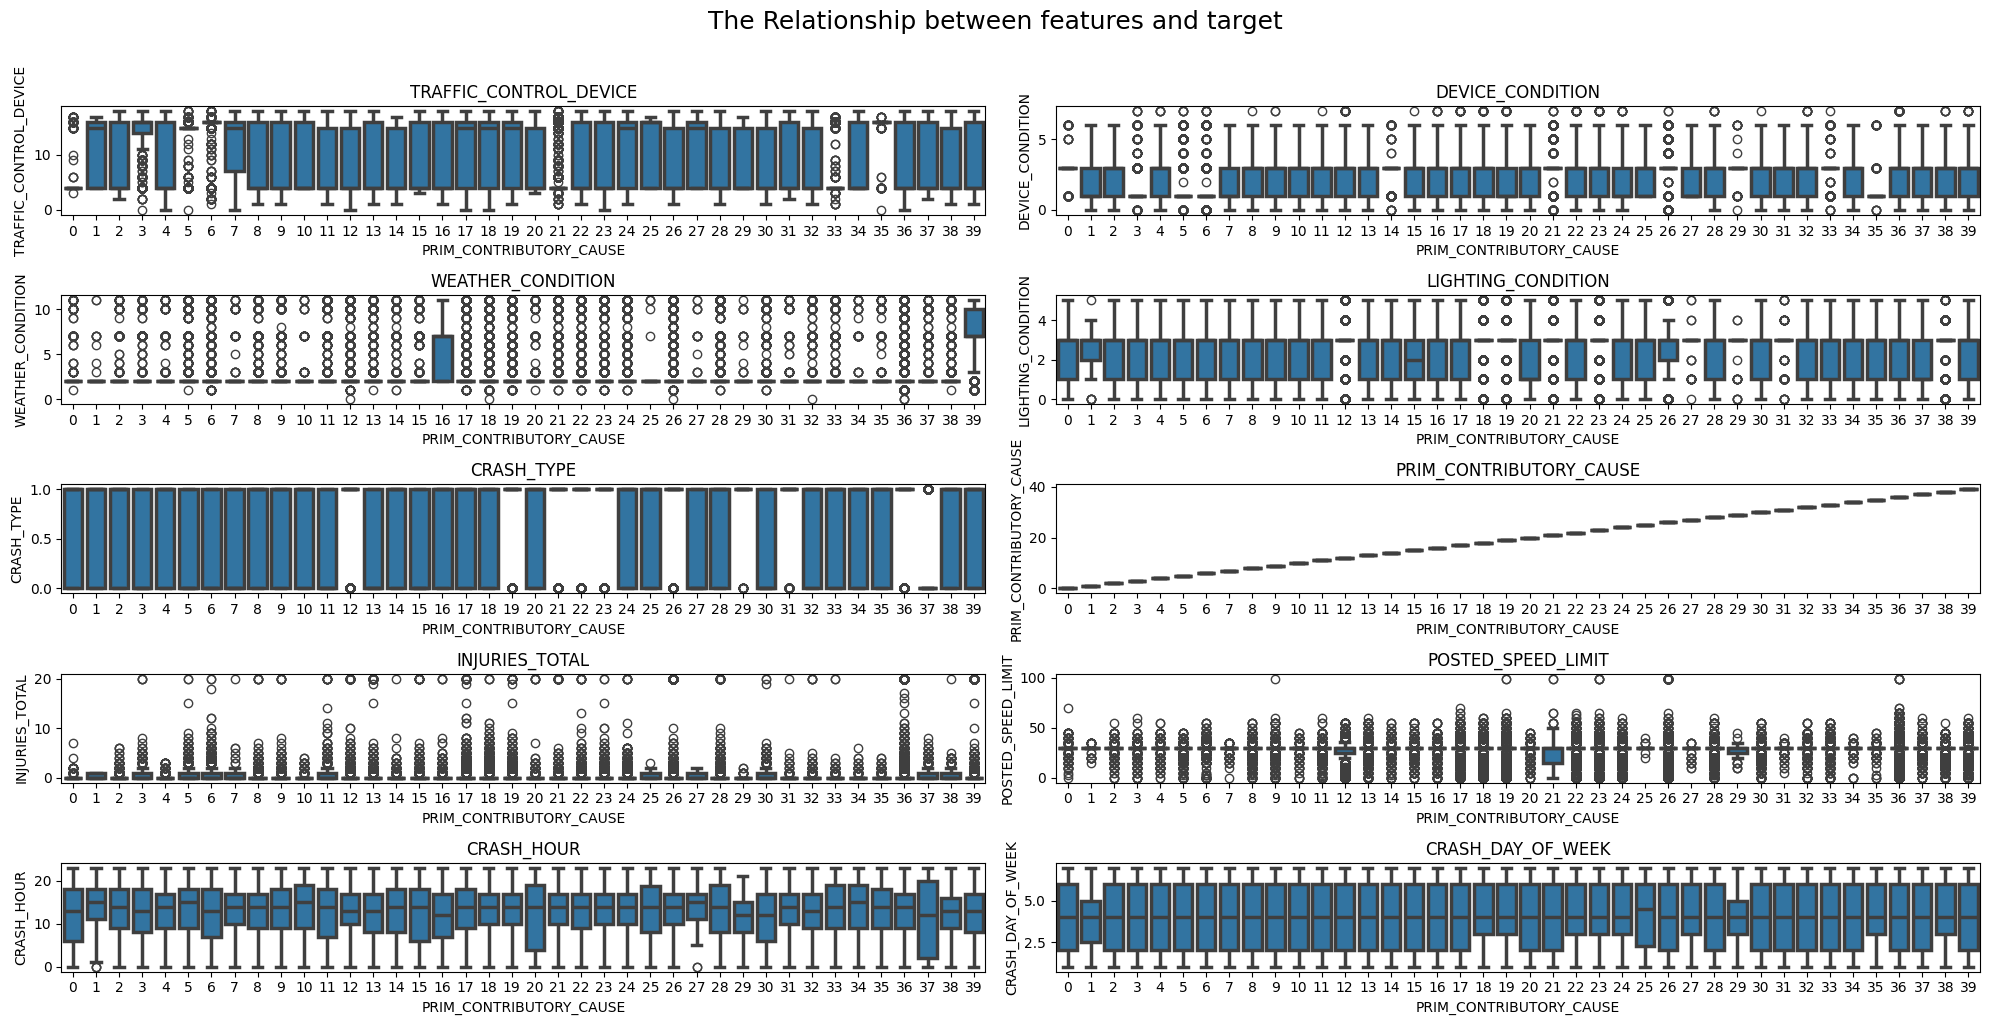

In [8]:
# Draw subplots for all the features with respect to its target to plot the outliers
fig, ax = plt.subplots(5,2, figsize=(20,10))
df = df.drop('CRASH_DATE', axis = 1)
for index,column in enumerate(list(df.columns[:10])):
  plt.subplot(5,2,index+1)
  sns.boxplot(y = df.loc[:, column], x = df["PRIM_CONTRIBUTORY_CAUSE"], linewidth=2.5)
  plt.title(column, size = 12)
plt.suptitle("The Relationship between features and target", y=1.02, size=18)
plt.tight_layout()
plt.show()

In [9]:
#Divide the dataset to train and test while labelling the target to y
y = df['PRIM_CONTRIBUTORY_CAUSE']
X = df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# ML/STATS - Team Member 1

Logistic Regression

In this model as we are dealing with a single class, liblinear algorithm is considered the best option while performing logistic regression.

In [10]:
#Applying Logistic regression model to find out the accuracy and get the primary cause of crash
model = LogisticRegression(solver='liblinear', random_state=0)
clf_lr = model.fit(X, y)
y_train_pred_lr = clf_lr.predict(X_train)
y_test_pred_lr = clf_lr.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_lr)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_lr)}')

Accuracy Score Train: 0.38721821424554526
Accuracy Score Test: 0.38753671437661075


Decision Trees

We have choosen the random state as 1 for this model and also plotted the decision tree for easy interpretation.

In [18]:
#Applying Decision tree model to find out the accuracy and get the primary cause of crash
dt_model = DecisionTreeClassifier(random_state=1, max_depth=5)
clf_dt = dt_model.fit(X, y)
y_train_pred_dt = clf_dt.predict(X_train)
y_test_pred_dt = clf_dt.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_dt)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_dt)}')

Accuracy Score Train: 0.3889722444039404
Accuracy Score Test: 0.3890138222445033


Let us check feature importance and get a better decision tree

In [19]:
dt_model.feature_importances_

array([0.12155087, 0.33973767, 0.05178891, 0.17744214, 0.19847524,
       0.00132662, 0.07466676, 0.03430555, 0.        , 0.00070623])

Apply bagging on the decision tree model to get better accuracy

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
bg_dt =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight = 'balanced', random_state = 42), n_estimators=50)

In [12]:
bg_dt.fit(X_train,y_train)
print(bg_dt.score(X_train, y_train))
bg_dt.score(X_test, y_test)

0.07598855985989042


0.07530544433232858

K Nearest Neighbour Classifier

We used the K Nearest Neighbour classifier for the third model but the accuracy remained the same for different k values. At last we fixed the value as 40.

In [22]:
##Applying KNN classifier model to find out the accuracy and get the primary cause of crash
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier(40)
clf_knc = model_knc.fit(X, y)
y_train_pred_knc = clf_knc.predict(X_train)
y_test_pred_knc = clf_knc.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_knc)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_knc)}')

Accuracy Score Train: 0.39457815146512737
Accuracy Score Test: 0.3942061161641481


# Additional Requirements
Visualizations

Bar Chart of important features

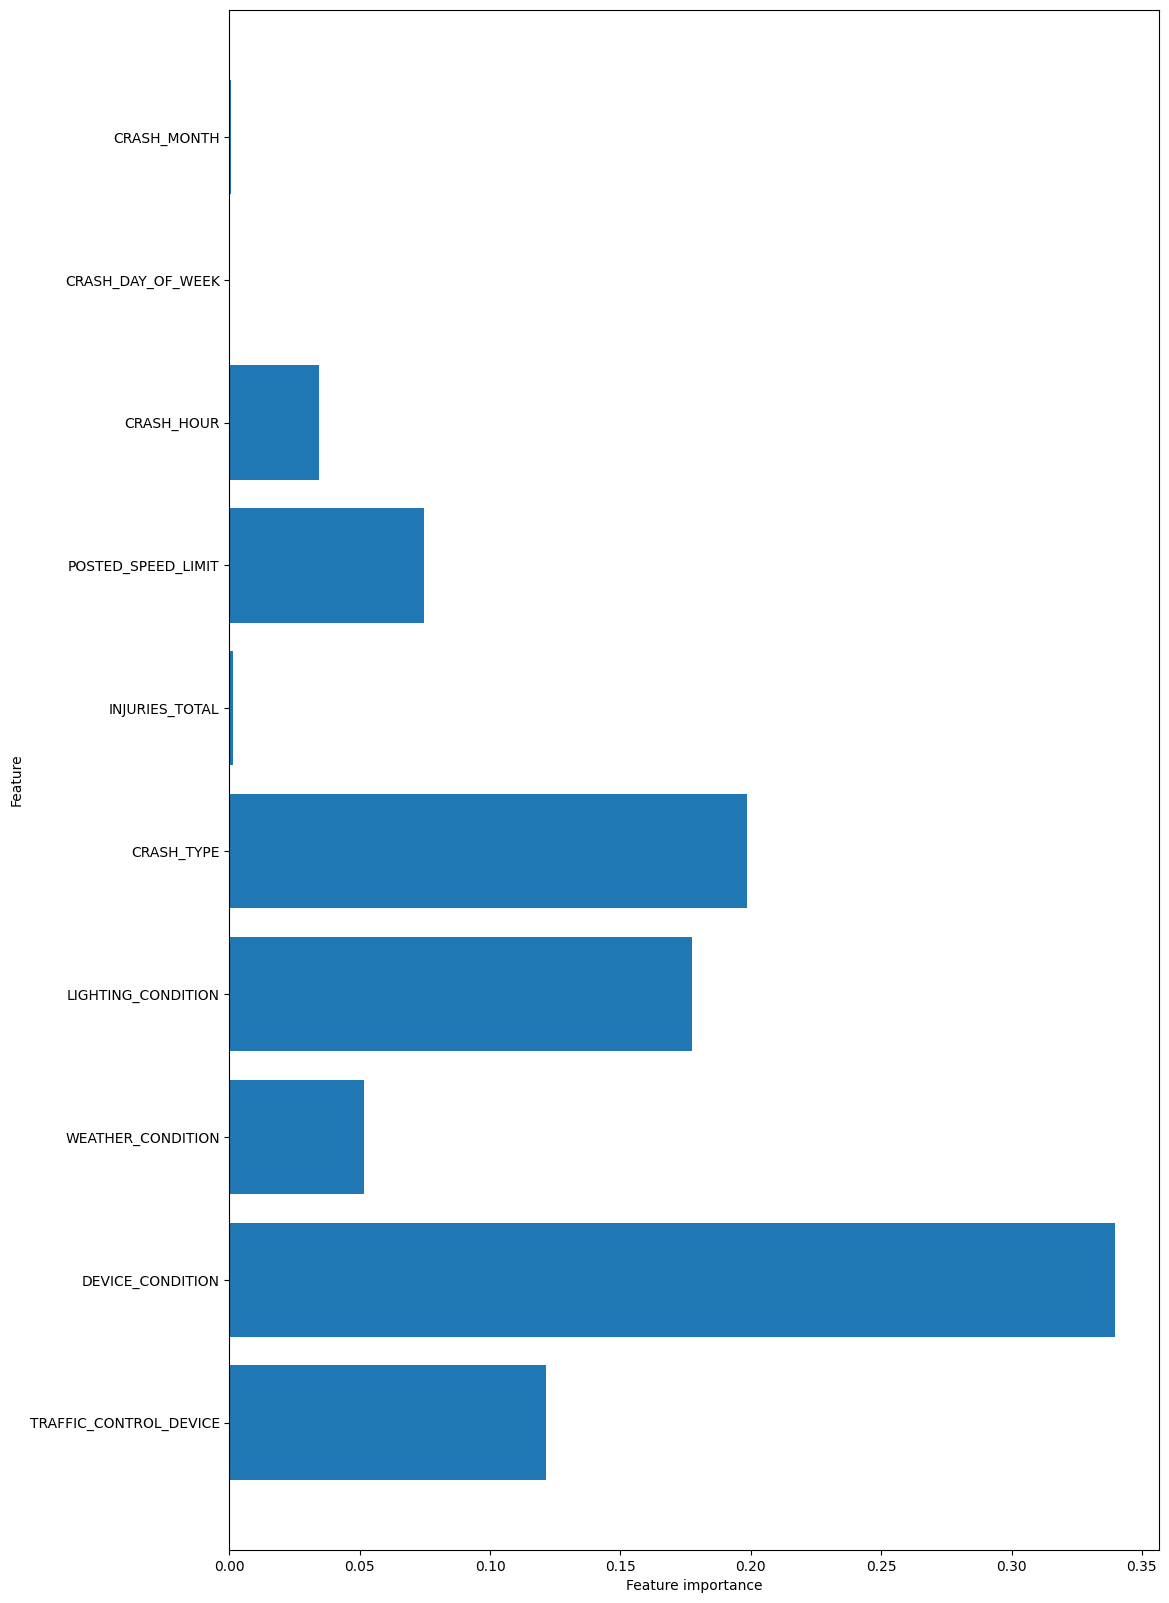

In [19]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt_model)

Decision Tree

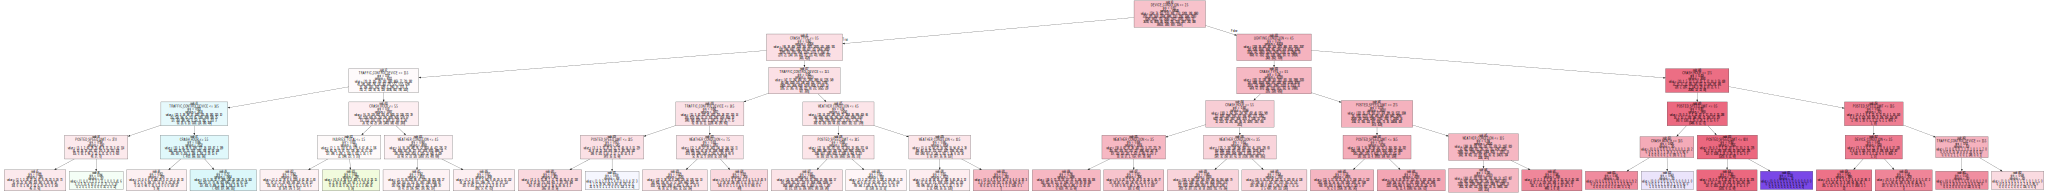

In [22]:
#Plotting the decision tree for the following dataset
def plot_tree(dt, used_cols, out_file='mytree.png'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)


os.environ["PATH"] += os.pathsep + 'C:/Users/NAYEEM AKHTER/AppData/Local/Programs/Python/Python38/bin/'
plot_tree(dt_model, X.columns.tolist())

# Results
Accuracy from each model is similar, we need to try different set of features to predict the primary cause of crash and get better results.
Both Logistic Regression and Decision trees gave an accuracy of 38.4 and 38.9% respectively.
KNN Classifier gave an accuracy of 39%. After taking important features and applying bagging on decision trees the accuracy increased to 60%.

# Data Cleaning - Team Member 2
-> The Crash table consists of important information about the actual crash that happened and has features like weather condition, lighting condition, primary cause of accident, number of injuries, etc.

-> The table initially consisted of 700K rows and 49 features. Initial cleaning of the table involved removing incomplete records with no date, and other key information like location, number of injuries, etc.

-> Columns with more than 80% of the instance values as NULL are removed

-> Columns such as report type, street number,lane count, etc which do not provide meaningful information are removed by manual inspection.

-> Value specific pruning is also done by eliminating rows with crash dates before 2018 as they do not provide recent trend and rows with no undetermined primary cause for crash are also removed.

-> Some rows with outlier values are removed using boxplots.

-> The table after cleaning consists of about 350K instances and 18 features.

In [5]:
crash_df = pd.read_csv('/Users/anish/Desktop/CS-418_project/Traffic_Crashes_Crashes.csv')

In [6]:
crash_df.shape

(708887, 49)

In [7]:
crash_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [8]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708887 entries, 0 to 708886
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                708887 non-null  object 
 1   RD_NO                          704896 non-null  object 
 2   CRASH_DATE_EST_I               53679 non-null   object 
 3   CRASH_DATE                     708887 non-null  object 
 4   POSTED_SPEED_LIMIT             708887 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         708887 non-null  object 
 6   DEVICE_CONDITION               708887 non-null  object 
 7   WEATHER_CONDITION              708887 non-null  object 
 8   LIGHTING_CONDITION             708887 non-null  object 
 9   FIRST_CRASH_TYPE               708887 non-null  object 
 10  TRAFFICWAY_TYPE                708887 non-null  object 
 11  LANE_CNT                       199001 non-null  float64
 12  ALIGNMENT                     

Convert CRASH_DATE column to datetime format

In [9]:
crash_df['CRASH_DATE'] = pd.to_datetime(crash_df['CRASH_DATE'])
crash_df.CRASH_DATE.dtype.name

'datetime64[ns]'

In [10]:
crash_df.CRASH_DATE_EST_I.unique()

array([nan, 'N', 'Y'], dtype=object)

There are many rows for which type of crash date unknown, which means it is not known if the crash date is estimated or the exact one. We are not removing any such rows as even if the date is estimated or not we are not bothered. We need the date on which a crash occurred.

In [11]:
print('Number of crashes with no crash date at all: ', crash_df['CRASH_DATE'].isnull().sum())
print('Number of crashes with estimated crash date: ', crash_df['CRASH_DATE_EST_I'].value_counts())
print('Number of crashes with unknown date type: ', crash_df['CRASH_DATE_EST_I'].isnull().sum())

Number of crashes with no crash date at all:  0
Number of crashes with estimated crash date:  Y    46847
N     6832
Name: CRASH_DATE_EST_I, dtype: int64
Number of crashes with unknown date type:  655208


In [12]:
for column in crash_df.columns:
  if (crash_df[column].isnull().sum()/crash_df.shape[0] > 0.8):
    crash_df = crash_df.drop(column, axis=1)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708887 entries, 0 to 708886
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                708887 non-null  object        
 1   RD_NO                          704896 non-null  object        
 2   CRASH_DATE                     708887 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             708887 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         708887 non-null  object        
 5   DEVICE_CONDITION               708887 non-null  object        
 6   WEATHER_CONDITION              708887 non-null  object        
 7   LIGHTING_CONDITION             708887 non-null  object        
 8   FIRST_CRASH_TYPE               708887 non-null  object        
 9   TRAFFICWAY_TYPE                708887 non-null  object        
 10  LANE_CNT                       199001 non-null  float64       
 11  

Removing columns irrelevant to the research question manually

In [13]:
drop_columns = ['RD_NO', 'REPORT_TYPE',
                'CRASH_TYPE', 'INTERSECTION_RELATED_I',
                'DAMAGE', 'DATE_POLICE_NOTIFIED',
                'STREET_NO', 'STREET_DIRECTION',
                'STREET_NAME', 'LANE_CNT',
                'BEAT_OF_OCCURRENCE']
crash_df = crash_df.drop(drop_columns, axis=1)

Year wise distribution of the number of crashes

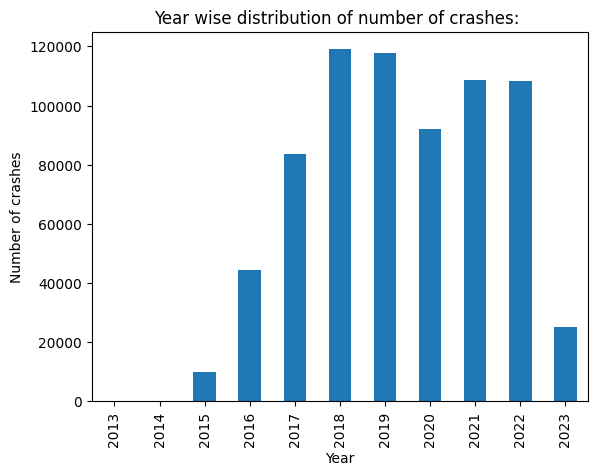

In [14]:
year_crashes = pd.Series(dict(sorted(dict(crash_df['CRASH_DATE'].dt.year.value_counts()).items())))
plt.title('Year wise distribution of number of crashes: ')
plt.xlabel('Year')
plt.ylabel('Number of crashes')

year_crashes.plot.bar()
plt.show()

Removing crashes with crash date before 2018 as they do not follow the recent trend and may mislead the model with outdated information

In [15]:
crash_df = crash_df[(crash_df['CRASH_DATE'] >= '2018-01-01')]

Remove crash rows with unknown primary cause of crash as it does not help our research question

In [16]:
crash_df = crash_df[crash_df['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [17]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349140 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                349140 non-null  object        
 1   CRASH_DATE                     349140 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             349140 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         349140 non-null  object        
 4   DEVICE_CONDITION               349140 non-null  object        
 5   WEATHER_CONDITION              349140 non-null  object        
 6   LIGHTING_CONDITION             349140 non-null  object        
 7   FIRST_CRASH_TYPE               349140 non-null  object        
 8   TRAFFICWAY_TYPE                349140 non-null  object        
 9   ALIGNMENT                      349140 non-null  object        
 10  ROADWAY_SURFACE_COND           349140 non-null  object        
 11  

Taking care of NULL values:
1) Rows with columns like 'LOCATION', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING' having NULL values are being removed as they are small in number

2) Though HIT_AND_RUN_1 has many Null values, its an important feature that could be helpful in the prediction of the research question which is why its being filled with 'U' for Unknown

In [18]:
crash_df = crash_df.dropna(subset=['LOCATION', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING'])
crash_df['HIT_AND_RUN_I'].fillna('U', inplace=True)

Remvoing Outliers

In [19]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345930 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                345930 non-null  object        
 1   CRASH_DATE                     345930 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             345930 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         345930 non-null  object        
 4   DEVICE_CONDITION               345930 non-null  object        
 5   WEATHER_CONDITION              345930 non-null  object        
 6   LIGHTING_CONDITION             345930 non-null  object        
 7   FIRST_CRASH_TYPE               345930 non-null  object        
 8   TRAFFICWAY_TYPE                345930 non-null  object        
 9   ALIGNMENT                      345930 non-null  object        
 10  ROADWAY_SURFACE_COND           345930 non-null  object        
 11  

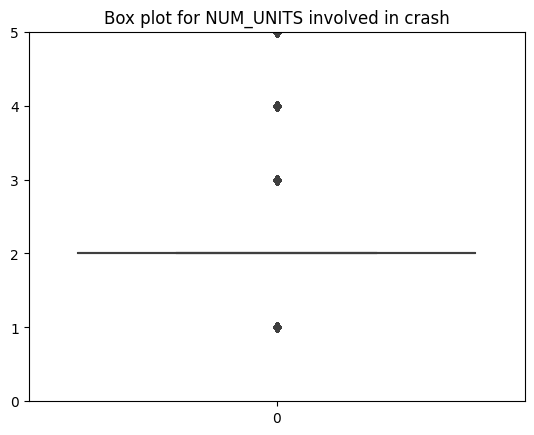

In [20]:
sns.boxplot(data=crash_df['NUM_UNITS']).set_ylim(0, 5)
plt.title('Box plot for NUM_UNITS involved in crash')
plt.show()

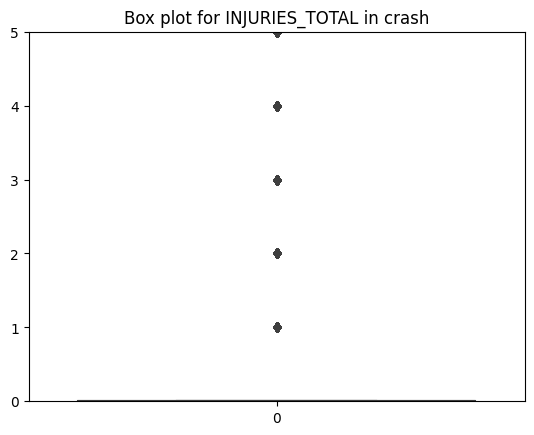

In [21]:
sns.boxplot(data=crash_df['INJURIES_TOTAL']).set_ylim(0, 5)
plt.title('Box plot for INJURIES_TOTAL in crash')
plt.show()

In [22]:
crash_df = crash_df[crash_df['NUM_UNITS'] <= 5]
crash_df = crash_df[crash_df['INJURIES_TOTAL'] <= 4]

Size of data after cleaning

In [23]:
crash_df.shape

(344695, 30)

# ML Stats - Team Member 2

In [24]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                344695 non-null  object        
 1   CRASH_DATE                     344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             344695 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         344695 non-null  object        
 4   DEVICE_CONDITION               344695 non-null  object        
 5   WEATHER_CONDITION              344695 non-null  object        
 6   LIGHTING_CONDITION             344695 non-null  object        
 7   FIRST_CRASH_TYPE               344695 non-null  object        
 8   TRAFFICWAY_TYPE                344695 non-null  object        
 9   ALIGNMENT                      344695 non-null  object        
 10  ROADWAY_SURFACE_COND           344695 non-null  object        
 11  

In [25]:
crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       61787
FOLLOWING TOO CLOSELY                                                               52907
NOT APPLICABLE                                                                      29560
IMPROPER OVERTAKING/PASSING                                                         27238
FAILING TO REDUCE SPEED TO AVOID CRASH                                              25253
IMPROPER BACKING                                                                    21816
IMPROPER LANE USAGE                                                                 19953
IMPROPER TURNING/NO SIGNAL                                                          18810
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 18283
DISREGARDING TRAFFIC SIGNALS                                                        11716
WEATHER                                                                              9134
OPERATING 

# Regression models for Research Question 2

In [26]:
X_cols = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR', 'LATITUDE', 'LONGITUDE']
Y_cols = ['INJURIES_TOTAL']

In [27]:
crash_df['INJURIES_TOTAL'].value_counts()

0.0    287075
1.0     42945
2.0     10340
3.0      3202
4.0      1133
Name: INJURIES_TOTAL, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'SEC_CONTRIBUTORY_CAUSE', 'PRIM_CONTRIBUTORY_CAUSE']

crash_df[categorical_columns] = crash_df[categorical_columns].apply(LabelEncoder().fit_transform)

In [29]:
X_data = crash_df[X_cols]
Y_data = crash_df[Y_cols]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=1, test_size=0.2, stratify=Y_data)

## Linear Regression
-> Linear Regression model is used as baseline as the basic form of regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train.values, Y_train.values)

In [38]:
print('MSE on test set for Linear Regression: ', mean_squared_error(Y_test.values, reg.predict(X_test.values)))

MSE on test set for Linear Regression:  0.3170693800632659


In [39]:
print('Regression score on test set for Linear Regression: ', reg.score(X_test.values, Y_test.values))

Regression score on test set for Linear Regression:  0.03894254902490968


## Polynomial Regression
-> Polynomial regression is used to check if non-linear relation between features and target value could improve the performance of the model, but we have not seen huge improvements, which could be because of the large number of features in the training data

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X_train.values)

poly_reg = LinearRegression().fit(poly_features, Y_train.values)

In [42]:
print('MSE on test set for Polynomial Regression: ', mean_squared_error(Y_test, poly_reg.predict(poly.fit_transform(X_test.values))))

MSE on test set for Polynomial Regression:  0.3117289364249424


In [43]:
print('Regression score on test set for Polynomial Regression: ', poly_reg.score(poly.fit_transform(X_test.values), Y_test))

Regression score on test set for Polynomial Regression:  0.055129773250406355


In [44]:
print(X_test.values[0])
print(Y_test.values[:2])

[ 30.           2.           3.           0.           8.
   2.           0.           1.          37.          17.
   2.          14.          41.6857645  -87.60328721]
[[2.]
 [0.]]


In [45]:
poly_reg.predict(poly.fit_transform(X_test.values)[:2])

array([[0.47359424],
       [0.12273988]])

## Random Forest Regressor
-> Advanced non-linear models like Random Forest Regressor and Gradient boosting regressor are tried to see if they can improve performance by extracting important features, and the performance was indeed improved compared to the previous two models.

-> Random Forest regression gave decent performance. Upon trial and error maximum depth of 10 is used for this model.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train.values, Y_train.values)

/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_84293/701259107.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train.values, Y_train.values)


RandomForestRegressor(max_depth=10, random_state=0)

In [47]:
print('MSE on test set for Random Forest Regressor: ', mean_squared_error(Y_test.values, regr.predict(X_test.values)))

MSE on test set for Random Forest Regressor:  0.2804788273738026


In [48]:
print('Regression score on test set for Random Forest Regressor: ', regr.score(X_test.values, Y_test.values))

Regression score on test set for Random Forest Regressor:  0.14985084073850452


## Gradient Boosting Regressor

-> For Gradient boosting regressor n_estimators=500, max_depth=10, learning_rate=0.01, loss="squared_error" are parameters taken after trial and error.

In [51]:
from sklearn import ensemble

reg = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=0.01, loss="squared_error")
reg.fit(X_train, Y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=500)

In [52]:
print('MSE on test set for Gradient Boosting Regressor: ', mean_squared_error(Y_test, reg.predict(X_test)))

MSE on test set for Gradient Boosting Regressor:  0.27819330746570425


In [53]:
print('Regression score on test set for Gradient Boosting Regressor: ', reg.score(X_test, Y_test))

Regression score on test set for Gradient Boosting Regressor:  0.15677839689858375


# Results
Both Linear and Polynomial regression gave similar performance in terms of score and error, so non-linear forms of regression are tried. \
Random Forest regression gave decent performance. Upon trial and error maximum depth of 10 is used for this model. \
For Gradient boosting regressor n_estimators=500, max_depth=10, learning_rate=0.01, loss="squared_error" are parameters taken after trial and error.

### The Regression scores for respective models:
Linear Regression: 0.03894254902490968 \
Polynomial Regression: 0.055129773250406355 \
Random Forest Regressor: 0.14985084073850452 \
Gradient Boosting Regressor: 0.15677839689858375

### The Mean Square Error for respective models:
Linear Regression: 0.3170693800632659 \
Polynomial Regression: 0.3117289364249424 \
Random Forest Regressor: 0.2804788273738026 \
Gradient Boosting Regressor: 0.27819330746570425

# Classification model for Research Question 1

## Neural Network model

In [54]:
X_cols = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'CRASH_HOUR', 'LATITUDE', 'LONGITUDE']
Y_cols = ['PRIM_CONTRIBUTORY_CAUSE']

In [55]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'SEC_CONTRIBUTORY_CAUSE']

crash_df[categorical_columns] = crash_df[categorical_columns].apply(LabelEncoder().fit_transform)

In [56]:
X_data = crash_df[X_cols]
Y_data = crash_df[Y_cols]

In [57]:
X_data.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,LATITUDE,LONGITUDE
0,30,2,3,17,10,3,0,1,12,2,0.0,0.0,0.0,14,41.884547,-87.641201
1,30,2,3,0,8,3,0,1,18,2,0.0,0.0,0.0,8,41.968562,-87.740659
5,25,2,3,7,10,3,0,1,26,2,0.0,0.0,0.0,19,41.782639,-87.694284
6,40,3,3,0,3,3,0,1,26,2,0.0,0.0,0.0,17,41.975826,-87.650420
8,30,10,3,0,8,3,4,1,36,2,0.0,0.0,0.0,10,41.744152,-87.585945


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=1, test_size=0.2, stratify=Y_data)

In [59]:
from sklearn.preprocessing import OneHotEncoder
import torch
import time

Y_train = torch.from_numpy(OneHotEncoder().fit_transform(Y_train).toarray())

In [60]:
Y_test = torch.from_numpy(OneHotEncoder().fit_transform(Y_test).toarray())

In [61]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 39)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [63]:
def train_model(device, model, X_train, Y_train, optimizer, epoch, batch_size):
    model.train()
    tot_loss = 0
    correct = 0
    batch_idx = 0
    start = 0
    for i in range(0, len(X_train), batch_size):
        data = X_train[i: min(len(X_train), i + batch_size)]
        label = Y_train[i: min(len(Y_train), i + batch_size)]
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.CrossEntropyLoss()(output, label)
        loss.backward()
        optimizer.step()

        predictions = output.argmax(dim=1, keepdim=True)
        correct += predictions.eq(label.argmax(dim=1, keepdim=True)).sum().item()
        tot_loss += loss.item()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accuracy: {:.2f}%'.format(
                epoch, batch_idx * len(data), len(X_train),
                100.0 * batch_idx /
                len(X_train), tot_loss / (batch_idx + 1),
                100.0 * correct / ((batch_idx + 1) * batch_size)))
        batch_idx += 1
    print('End of Epoch: {}'.format(epoch))
    print('Training Loss: {:.6f}, Training Accuracy: {:.2f}%'.format(
        tot_loss / len(X_train), 100.0 * correct / (len(X_train))))

    return tot_loss / len(X_train), 100.0 * correct / (len(X_train))

In [64]:
def validation_model(device, model, X_val, Y_val, batch_size):
    model.eval()
    tot_loss = 0
    correct = 0
    with torch.no_grad():
        for i in range(0, len(X_val), batch_size):
            data = X_val[i: min(len(X_val), i + batch_size)]
            label = Y_val[i: min(len(Y_val), i + batch_size)]
            data, label = data.to(device), label.to(device)
            output = model(data)
            tot_loss += torch.nn.CrossEntropyLoss()(output, label).item()
            predictions = output.argmax(dim=1, keepdim=True)
            correct += predictions.eq(label.argmax(dim=1, keepdim=True)).sum().item()

    print('Validation Loss: {:.6f}, Validation Accuracy: {:.2f}%'.format(
        tot_loss / len(X_val),
        100.0 * correct / (len(X_val))
    ))

    return tot_loss/len(X_val), 100.0 * correct / (len(X_val))

In [65]:
def test_model(device, model, X_test, Y_test, batch_size):
    model.eval()
    tot_loss = 0
    correct = 0
    with torch.no_grad():
        for i in range(0, len(X_test), batch_size):
            data = X_test[i: min(len(X_test), i + batch_size)]
            label = Y_test[i: min(len(Y_test), i + batch_size)]
            data, label = data.to(device), label.to(device)
            output = model(data)
            tot_loss += torch.nn.CrossEntropyLoss()(output, label).item()
            predictions = output.argmax(dim=1, keepdim=True)
            correct += predictions.eq(label.argmax(dim=1, keepdim=True)).sum().item()

    print('Test Loss: {:.6f}, Test Accuracy: {:.2f}%'.format(
        tot_loss / len(X_test),
        100.0 * correct / (len(X_test))
    ))

    return tot_loss/len(X_test), 100.0 * correct / (len(X_test))

/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_84293/2454170031.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train_tensor = torch.tensor(Y_train[1:training_length]).to(torch.float64)
/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_84293/2454170031.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_val_tensor = torch.tensor(Y_train[training_length:]).to(torch.float64)
/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_84293/2454170031.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_test_t

Train Epoch: 1 [0/234391 (0%)]	Loss: 7.169628, Accuracy: 0.59%
Train Epoch: 1 [51200/234391 (0%)]	Loss: 2.771515, Accuracy: 22.36%
Train Epoch: 1 [102400/234391 (0%)]	Loss: 2.550932, Accuracy: 27.33%
Train Epoch: 1 [153600/234391 (0%)]	Loss: 2.453476, Accuracy: 29.64%
Train Epoch: 1 [204800/234391 (0%)]	Loss: 2.388409, Accuracy: 31.21%
End of Epoch: 1
Training Loss: 0.004613, Training Accuracy: 31.86%
Validation Loss: 0.004288, Validation Accuracy: 36.41%
Test Loss: 2.189962, Test Accuracy: 36.14%
Train Epoch: 2 [0/234391 (0%)]	Loss: 2.218887, Accuracy: 37.30%
Train Epoch: 2 [51200/234391 (0%)]	Loss: 2.173887, Accuracy: 36.16%
Train Epoch: 2 [102400/234391 (0%)]	Loss: 2.177656, Accuracy: 36.01%
Train Epoch: 2 [153600/234391 (0%)]	Loss: 2.173956, Accuracy: 36.04%
Train Epoch: 2 [204800/234391 (0%)]	Loss: 2.169250, Accuracy: 36.14%
End of Epoch: 2
Training Loss: 0.004232, Training Accuracy: 36.22%
Validation Loss: 0.004263, Validation Accuracy: 36.50%
Test Loss: 2.176656, Test Accuracy: 

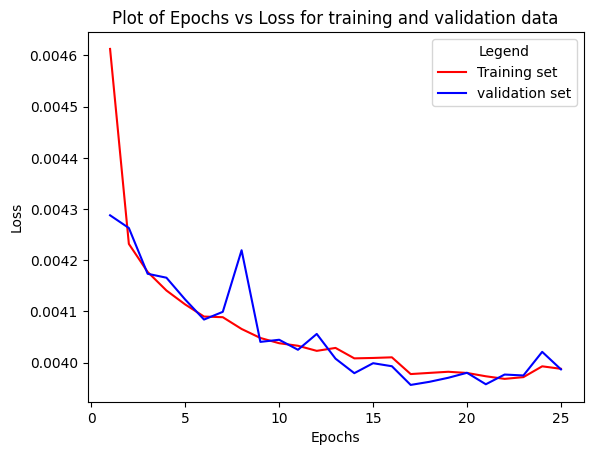

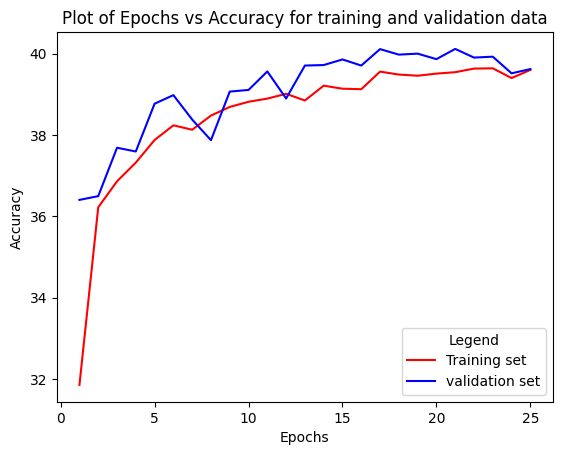

In [66]:
torch.manual_seed(2021)
train_batch_size = 512
validation_batch_size = 512
test_batch_size = 1
learning_rate = 0.01

training_length = int(0.85 * len(X_train))
validation_length = len(X_train) - training_length

X_train_tensor = torch.tensor(X_train[1:training_length].values).to(torch.float64)
Y_train_tensor = torch.tensor(Y_train[1:training_length]).to(torch.float64)

X_val_tensor = torch.tensor(X_train[training_length:].values).to(torch.float64)
Y_val_tensor = torch.tensor(Y_train[training_length:]).to(torch.float64)

X_test_tensor = torch.tensor(X_test.values).to(torch.float64)
Y_test_tensor = torch.tensor(Y_test).to(torch.float64)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)
model = model.double()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = StepLR(optimizer, step_size=8, gamma=0.8)

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []
test_loss = []
test_accuracy = []

start_time = time.time()
for epoch in range(0, 25):
    loss, accuracy = train_model(device, model, X_train_tensor, Y_train_tensor, optimizer, epoch + 1, train_batch_size)
    training_loss.append(loss)
    training_accuracy.append(accuracy)

    loss, accuracy = validation_model(device, model, X_val_tensor, Y_val_tensor, validation_batch_size)
    validation_loss.append(loss)
    validation_accuracy.append(accuracy)

    loss, accuracy = test_model(device, model, X_test_tensor, Y_test_tensor, test_batch_size)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

    scheduler.step()

print('Training completed in {} seconds'.format(time.time() - start_time))

%matplotlib inline
plt.title('Plot of Epochs vs Loss for training and validation data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(list(range(1, len(training_loss) + 1)), training_loss, 'r', label='Training set')
plt.plot(list(range(1, len(validation_loss) + 1)), validation_loss, 'b', label='validation set')
plt.legend(title='Legend')
plt.show()

plt.title('Plot of Epochs vs Accuracy for training and validation data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(list(range(1, len(training_loss) + 1)), training_accuracy, 'r', label='Training set')
plt.plot(list(range(1, len(validation_loss) + 1)), validation_accuracy, 'b', label='validation set')
plt.legend(title='Legend')
plt.show()

torch.save(model.state_dict(), 'ML_Model.pt')


# Additional Requirements

/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_79672/1187064580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crash_df_tmp.corr(), annot=True, linewidths=.5, ax=axis)


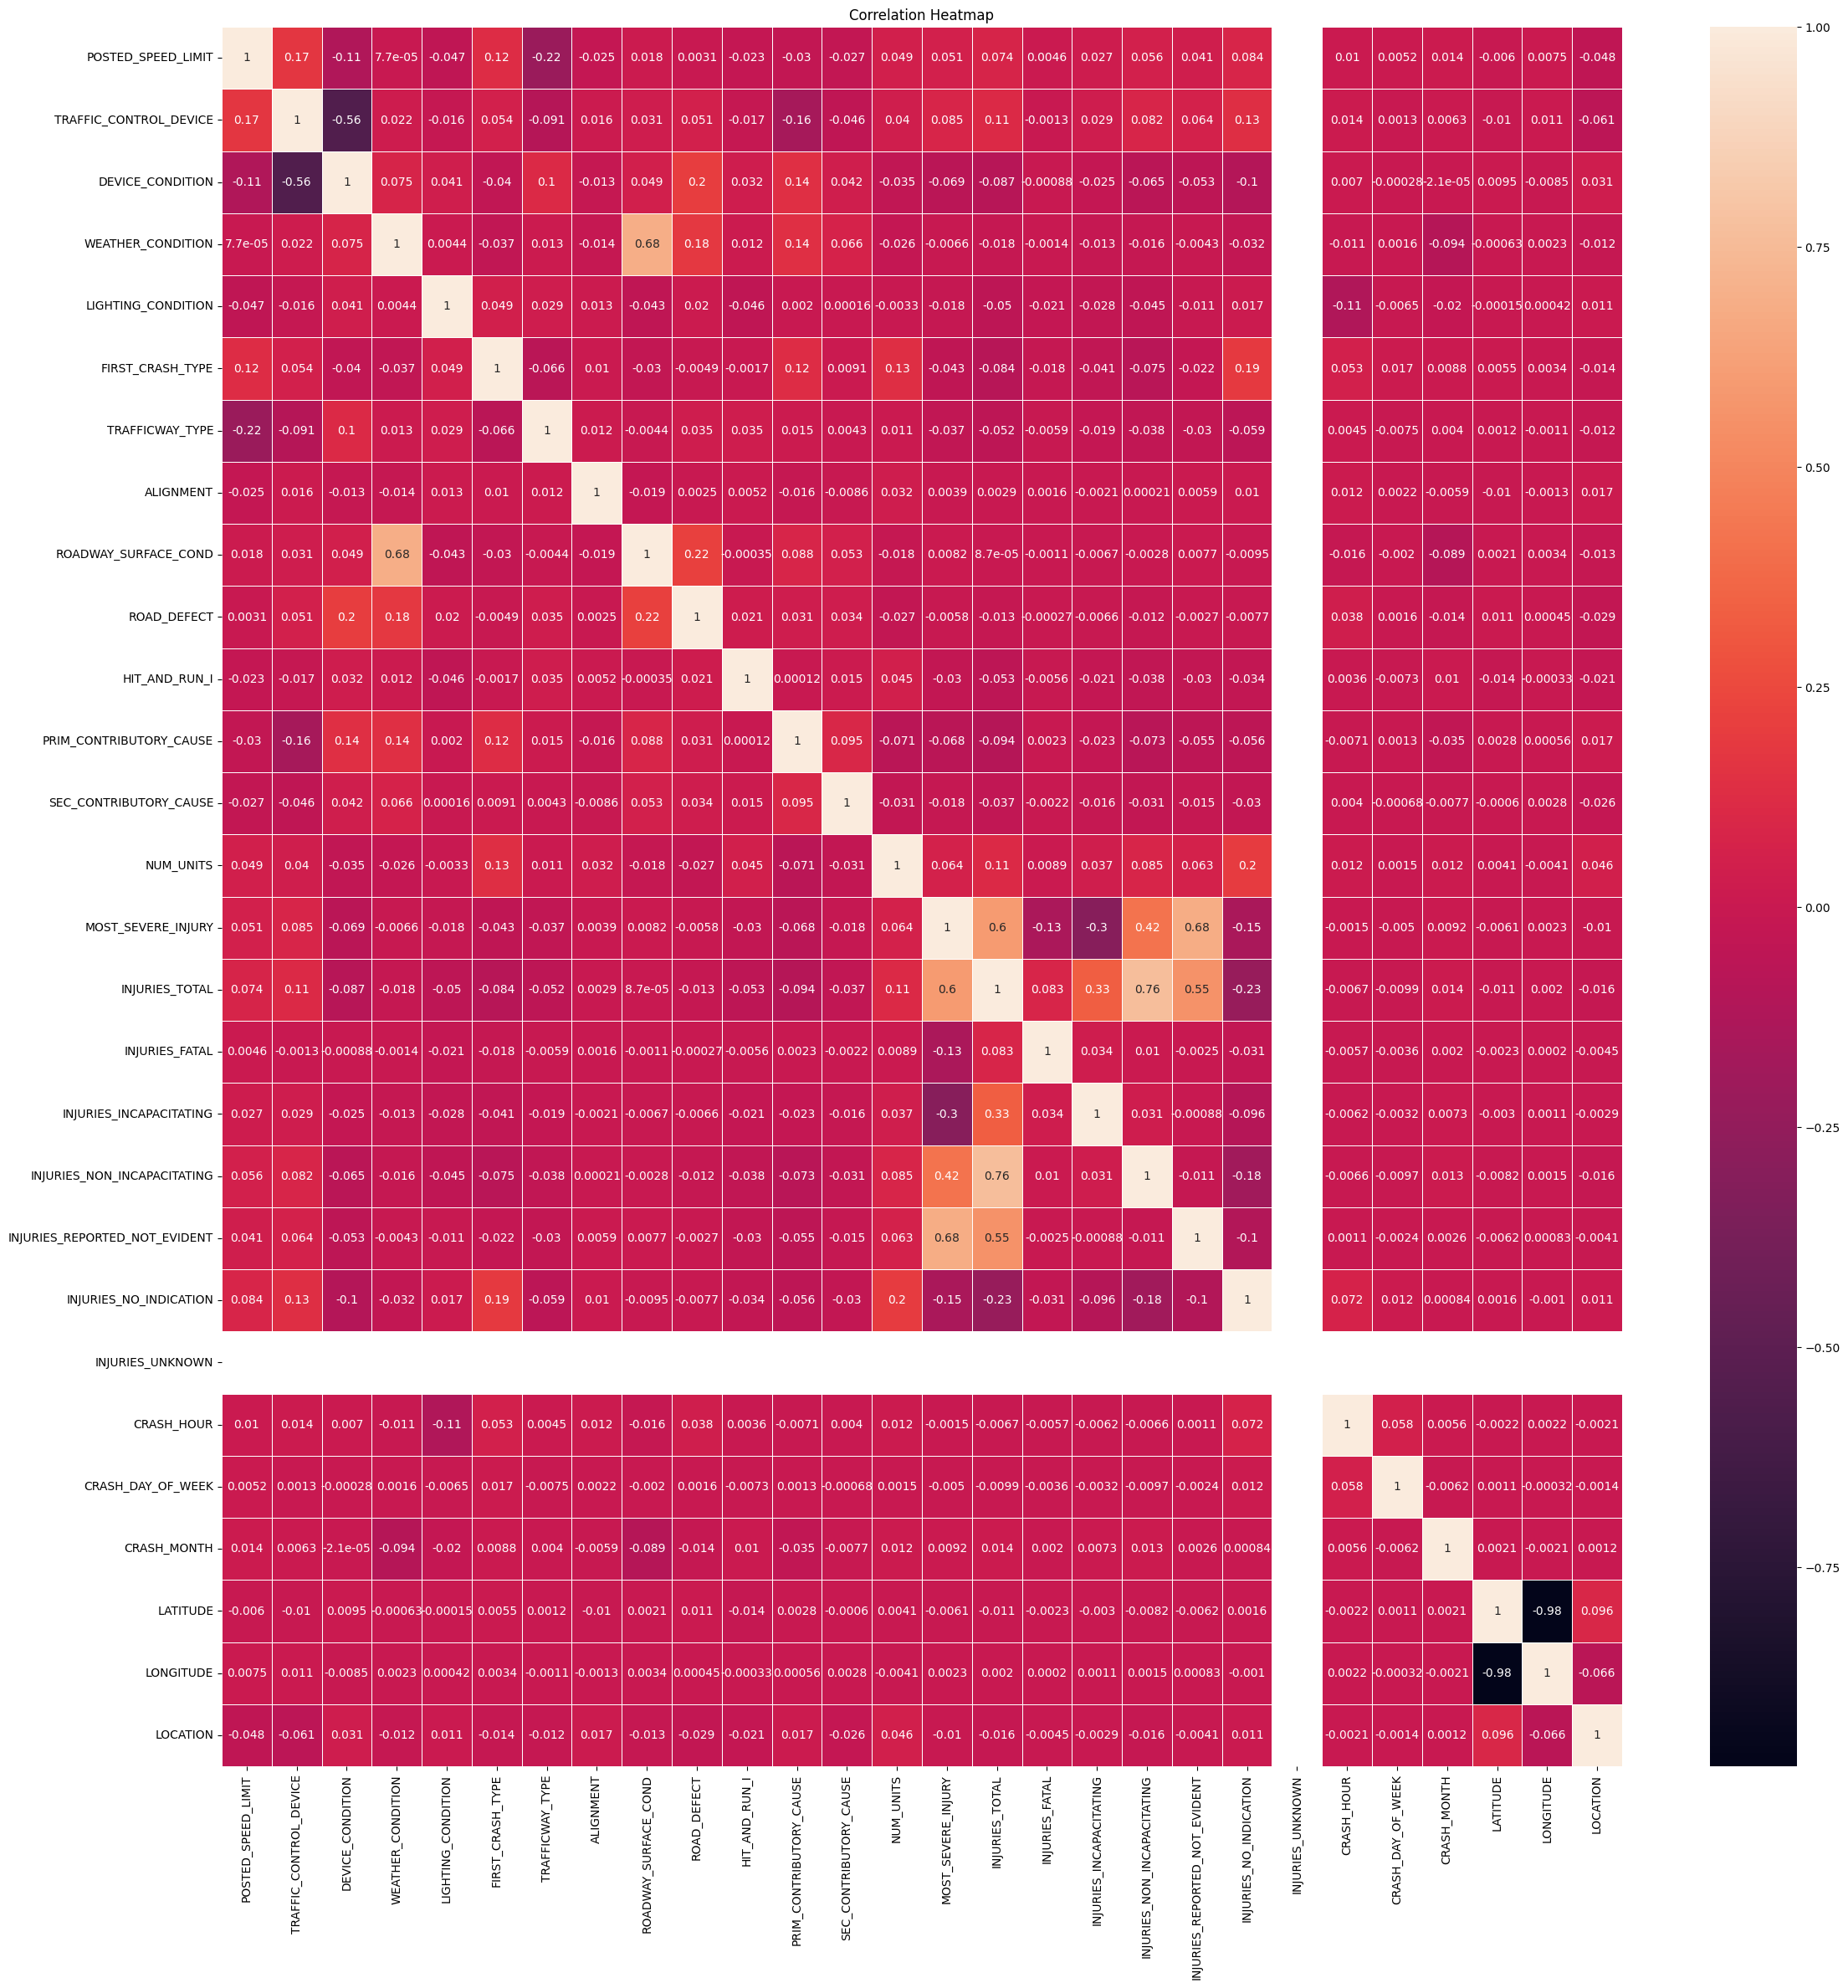

In [29]:
fig, axis = plt.subplots(figsize=(27,27))
sns.heatmap(crash_df.corr(), annot=True, linewidths=.5, ax=axis)
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning - Team Member 3

In [11]:
import pandas as pd
import numpy as np
import os
path = os.path.join('C:' + os.sep, 'Users', 'Vamsi', 'Desktop', 'Traffic_Crashes_-_People (2).csv')
df = pd.read_csv(path, low_memory=False)
#df = pd.read_csv('\Users\vamsi\Desktop\Traffic_Crashes_-_People (2).csv')

In [12]:
#Removing unwanted coloumns.
df.drop('DRIVERS_LICENSE_STATE', inplace=True, axis=1)
df.drop('DRIVERS_LICENSE_CLASS',inplace=True, axis=1)
df.drop('HOSPITAL',inplace=True, axis=1)
df.drop('EMS_AGENCY',inplace=True, axis=1)
df.drop('EMS_RUN_NO',inplace=True, axis=1)
df.drop('CELL_PHONE_USE',inplace=True, axis=1)
df.drop('BAC_RESULT',inplace=True, axis=1)
df.drop('BAC_RESULT VALUE',inplace=True, axis=1)
df.drop('PEDPEDAL_LOCATION',inplace=True, axis=1)
df.drop('PEDPEDAL_VISIBILITY',inplace=True, axis=1)
df.drop('SEAT_NO',inplace=True, axis=1)

In [13]:
df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN


In [16]:
print(df['PEDPEDAL_ACTION'].value_counts().idxmax())
df[['PEDPEDAL_ACTION']] = df[['PEDPEDAL_ACTION']].fillna('CROSSING - WITH SIGNAL')

CROSSING - WITH SIGNAL


In [17]:
print(df['PHYSICAL_CONDITION'].value_counts().idxmax())
df[['PHYSICAL_CONDITION']] = df[['PHYSICAL_CONDITION']].fillna('NORMAL')

NORMAL


In [18]:
print(df['DRIVER_VISION'].value_counts().idxmax())
df[['DRIVER_VISION']] = df[['DRIVER_VISION']].fillna('NOT OBSCURED')

NOT OBSCURED


In [19]:
print(df['DRIVER_ACTION'].value_counts().idxmax())
df[['DRIVER_ACTION']] = df[['DRIVER_ACTION']].fillna('NONE')


NONE


In [20]:
print(df['INJURY_CLASSIFICATION'].value_counts().idxmax())
df[['INJURY_CLASSIFICATION']] = df[['INJURY_CLASSIFICATION']].fillna('NO INDICATION OF INJURY')


NO INDICATION OF INJURY


In [21]:
print(df['EJECTION'].value_counts().idxmax())
df[['EJECTION']] = df[['EJECTION']].fillna('NONE')

NONE


In [22]:
print(df['AIRBAG_DEPLOYED'].value_counts().idxmax())
df[['AIRBAG_DEPLOYED']] = df[['AIRBAG_DEPLOYED']].fillna('DID NOT DEPLOY')

DID NOT DEPLOY


In [23]:
print(df['SAFETY_EQUIPMENT'].value_counts().idxmax())
df[['SAFETY_EQUIPMENT']] = df[['SAFETY_EQUIPMENT']].fillna('SAFETY BELT USED')


SAFETY BELT USED


In [24]:
print(df['AGE'].mean())
df[['AGE']] = df[['AGE']].fillna(37.0)

37.8493633685349


In [25]:
print(df['SEX'].value_counts().idxmax())
df[['SEX']] = df[['SEX']].fillna('M')


M


In [26]:
df.dropna(subset=['ZIPCODE', 'STATE', 'CITY','VEHICLE_ID'], inplace=True)
df.dropna(subset=['RD_NO'], inplace=True)


In [27]:
df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION'],
      dtype='object')

In [28]:
df.shape[0]

996969

**Data cleaning**: The data before cleaning contains 30 columns each with 1554338 rows and many NaN values, after carefull analysis, I removed nearly 10 coloumns of data and replaced NaN values of columns with it's respective mode or mean value and removed many rows with NaN values which cannot be replaced by mean or mode since they are unique ID's after applying all the above processes the data set reduced to 20 columns and 996969 rows.

# ML Stats - Team Member 3
The research question in this case is related to the age and the gender of the person involved in the crash, I choose methods clustering to work on the research question such as

K-means:
K-means clustering is a popular unsupervised machine learning algorithm used for clustering and classification tasks. It involves partitioning a given dataset into K clusters, where K is a pre-determined number of clusters.

The algorithm works by randomly selecting K data points from the dataset to serve as the initial centroids of the clusters. Each data point is then assigned to the nearest centroid based on a distance metric, such as Euclidean distance. The centroid of each cluster is then updated to the mean of all the data points assigned to that cluster. This process is repeated iteratively until the centroids converge or a stopping criterion is met.

Gaussian Mixture Model:
Gaussian Mixture Model (GMM) clustering is a probabilistic unsupervised machine learning algorithm that aims to identify underlying patterns in a dataset by modeling each cluster as a Gaussian distribution.

The GMM algorithm assumes that the dataset is generated from a mixture of Gaussian distributions, each representing a different cluster. The algorithm then estimates the parameters of these Gaussian distributions, such as the mean and variance, using the Expectation-Maximization (EM) algorithm.

BIRCH(Balanced Iterative Reducing and Clustering using Hierarchies):
BIRCH is a hierarchical clustering algorithm that is designed to be memory-efficient and scalable for large datasets.

BIRCH clustering builds a hierarchical cluster tree by initially constructing a Clustering Feature Tree (CFT) using a combination of hierarchical clustering and data summarization. The CFT summarizes the dataset into a small set of representative points, called cluster centroids, which are then used to build the hierarchical cluster tree. The algorithm uses a clustering criterion called the CF (Clustering Feature) criterion to determine the merging of clusters.

In [32]:
df.dtypes

PERSON_ID                 object
PERSON_TYPE               object
CRASH_RECORD_ID           object
RD_NO                     object
VEHICLE_ID               float64
CRASH_DATE                object
CITY                      object
STATE                     object
ZIPCODE                   object
SEX                       object
AGE                      float64
SAFETY_EQUIPMENT          object
AIRBAG_DEPLOYED           object
EJECTION                  object
INJURY_CLASSIFICATION     object
DRIVER_ACTION             object
DRIVER_VISION             object
PHYSICAL_CONDITION        object
PEDPEDAL_ACTION           object
dtype: object

In [33]:
df.value_counts("INJURY_CLASSIFICATION")

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     908232
NONINCAPACITATING INJURY     48572
REPORTED, NOT EVIDENT        31624
INCAPACITATING INJURY         8101
FATAL                          440
dtype: int64

In [37]:
!pip install -U scikit-learn

In [38]:
from sklearn.model_selection import train_test_split
X= df[['SEX','AGE']]
X.replace('X', 0, inplace=True)
X.replace('M', 1, inplace=True)
X.replace('F', 2, inplace=True)


y= df['INJURY_CLASSIFICATION']
y.replace('NO INDICATION OF INJURY', 0, inplace=True)
y.replace('NONINCAPACITATING INJURY', 1, inplace=True)
y.replace('REPORTED, NOT EVIDENT', 2, inplace=True)
y.replace('INCAPACITATING INJURY', 3, inplace=True)
y.replace('FATAL', 4, inplace=True)



# Split the dataset into train and test sets, stratified by the class labels
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

c:\users\vamsi\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [39]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

797575
199394
797575
199394


In [40]:
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X_train.values,y_train.values.reshape(-1,1))

KMeans(n_clusters=5)

In [41]:
y_pred= kmeans_model.predict(X_test.values)
accuracy_score(y_test.values, y_pred)

0.05823645646308314

In [48]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(X_train.values,y_train.values.reshape(-1,1))

GaussianMixture(n_components=2, random_state=0)

In [49]:
y_pred= gm.predict(X_test.values)
accuracy_score(y_test.values.reshape(-1,1), y_pred)

0.6536405308083493

In [44]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=5)
brc.fit(X_train.values,y_train.values.reshape(-1,1))

Birch(n_clusters=5)

In [45]:
y_pred= brc.predict(X_test.values)
accuracy_score(y_test.values.reshape(-1,1), y_pred)

0.0576948152903297

# Results: 
The clustering analysis resulted in the identification of distinct groups within the dataset. We evaluated the clustering performance using accuracy, we applied three clustering models on our dataset which are K-means, Gaussian mixture and BIRCH 
after applying we found that the Gaussian mixture has a better accuracy followed by BIRCH and k-means.
These are the respective accuracy scores:
K-means: 0.05823645646308314
Gaussian Mixture: 0.6536405308083493
BIRCH: 0.0576948152903297


# Exploratory Data Analysis - Team Member 1
The datatype of each column is mentioned below and visualization is done for two different scenarios
1) Year of vehicle manufactured involved in a crash
2) Type of vehicle involved in a crash

CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int32
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR          int32
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


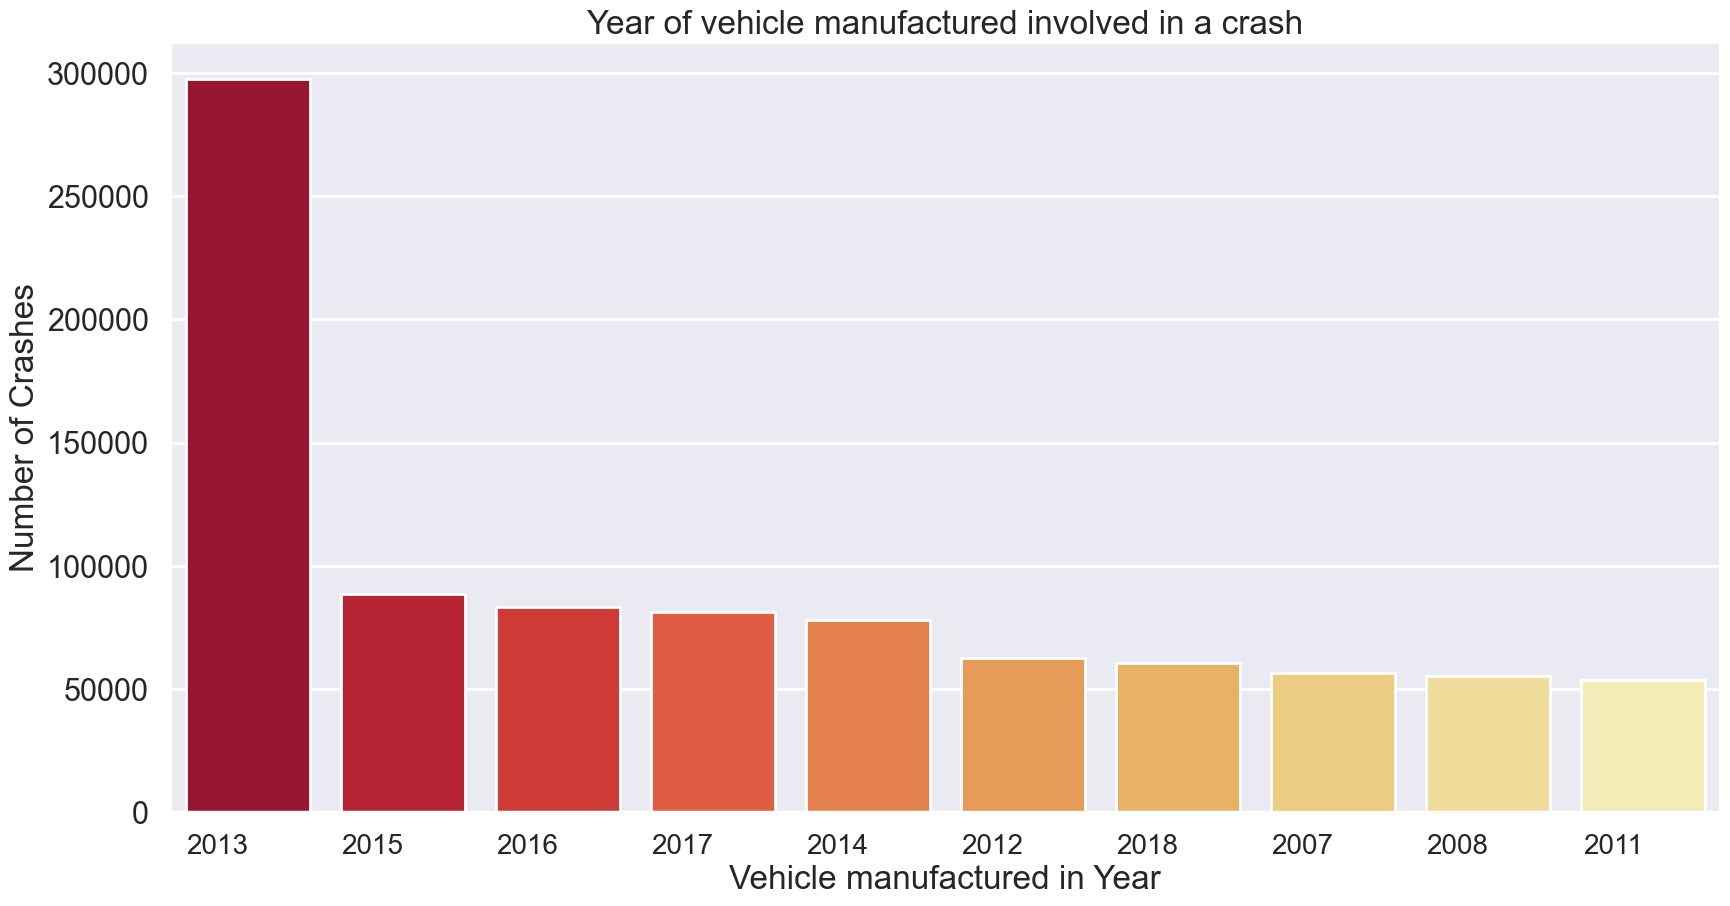

In [11]:
v_data = v_data.astype({'VEHICLE_YEAR':'int'})
print(v_data.dtypes)
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="VEHICLE_YEAR", data=v_data,order = v_data['VEHICLE_YEAR'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle manufactured in Year')
plt.ylabel('Number of Crashes')
plt.title('Year of vehicle manufactured involved in a crash')
plt.show()

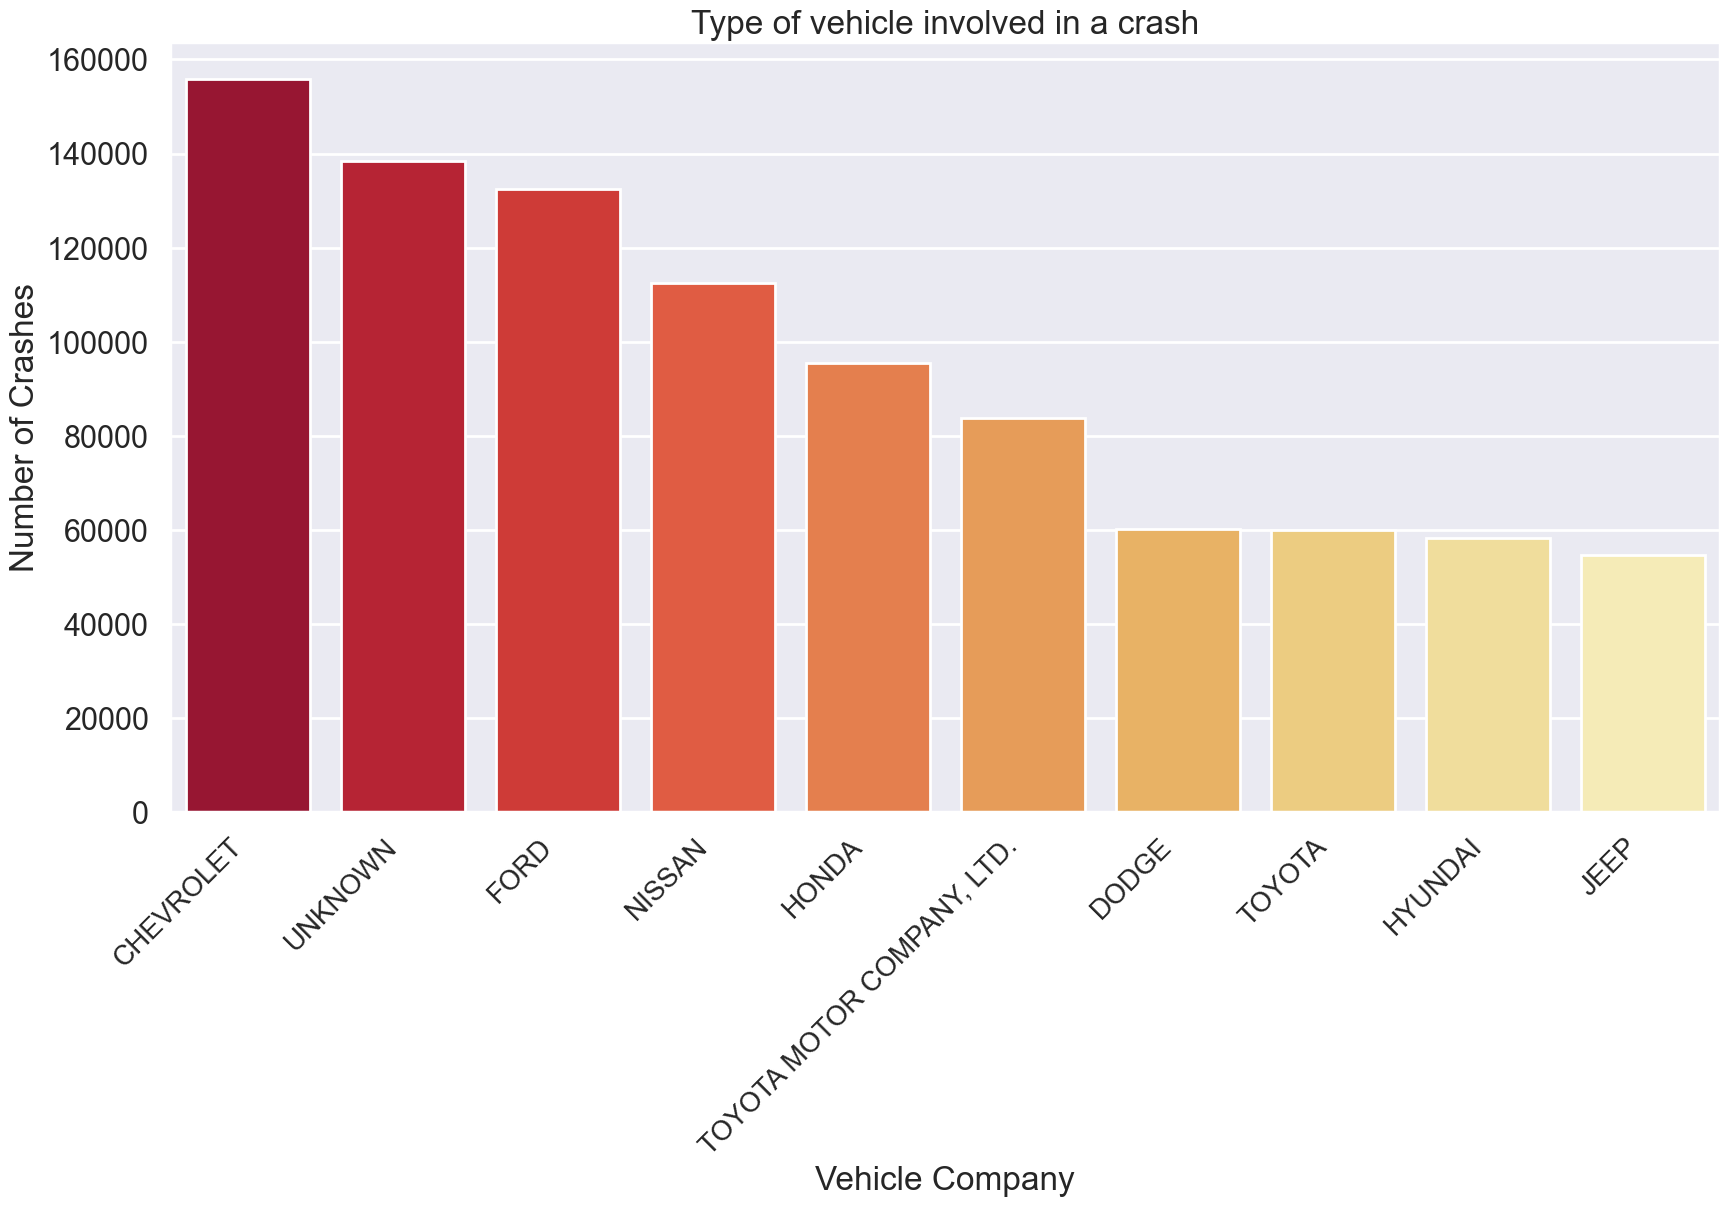

In [12]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    rotation=45,
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="MAKE", data=v_data,order = v_data['MAKE'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle Company')
plt.ylabel('Number of Crashes')
plt.title('Type of vehicle involved in a crash')
plt.show()

# Exploratory Data Analysis - Team Member 2

In [27]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                344695 non-null  object        
 1   CRASH_DATE                     344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             344695 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         344695 non-null  object        
 4   DEVICE_CONDITION               344695 non-null  object        
 5   WEATHER_CONDITION              344695 non-null  object        
 6   LIGHTING_CONDITION             344695 non-null  object        
 7   FIRST_CRASH_TYPE               344695 non-null  object        
 8   TRAFFICWAY_TYPE                344695 non-null  object        
 9   ALIGNMENT                      344695 non-null  object        
 10  ROADWAY_SURFACE_COND           344695 non-null  object        
 11  

In [28]:
crash_df_tmp = crash_df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()

for col in crash_df_tmp.columns[1:]:
  if(crash_df_tmp[col].dtype == object):
    crash_df_tmp[col] = labelencoder.fit_transform(crash_df_tmp[col])

crash_df_tmp.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,30,16,1,2,3,17,10,3,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,40251
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,2018-09-05 08:40:00,30,4,3,2,3,0,8,3,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,131945
5,7943cacbae1bb60e0f056bf53bdaadc0d6092000c19167...,2022-07-24 19:23:00,25,4,3,2,3,7,10,3,...,0.0,0.0,1.0,0.0,19,1,7,41.782639,-87.694284,94027
6,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,2022-07-15 17:10:00,40,4,3,3,3,0,3,3,...,0.0,0.0,2.0,0.0,17,6,7,41.975826,-87.650420,50280
8,7b4700df143a2170b338fdf28c3ccb7c3aaa4527b0734e...,2018-11-26 10:00:00,30,16,1,10,3,0,8,3,...,0.0,0.0,2.0,0.0,10,2,11,41.744152,-87.585945,7811


Removing some columns based on above correlation and manual inspection

In [30]:
columns = ['ALIGNMENT', 'TRAFFIC_CONTROL_DEVICE',
           'DEVICE_CONDITION', 'TRAFFICWAY_TYPE',
           'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE',
           'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
           'MOST_SEVERE_INJURY', 'INJURIES_REPORTED_NOT_EVIDENT',
           'INJURIES_NO_INDICATION']
crash_df = crash_df.drop(columns, axis=1)

In [31]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CRASH_RECORD_ID              344695 non-null  object        
 1   CRASH_DATE                   344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT           344695 non-null  int64         
 3   WEATHER_CONDITION            344695 non-null  object        
 4   LIGHTING_CONDITION           344695 non-null  object        
 5   FIRST_CRASH_TYPE             344695 non-null  object        
 6   ROADWAY_SURFACE_COND         344695 non-null  object        
 7   ROAD_DEFECT                  344695 non-null  object        
 8   HIT_AND_RUN_I                344695 non-null  object        
 9   PRIM_CONTRIBUTORY_CAUSE      344695 non-null  object        
 10  SEC_CONTRIBUTORY_CAUSE       344695 non-null  object        
 11  NUM_UNITS                 

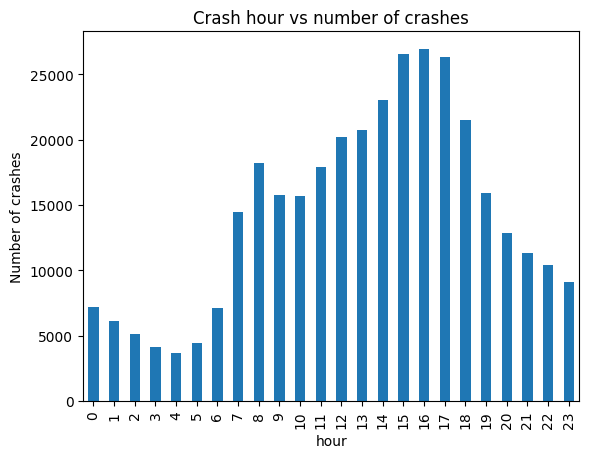

In [32]:
crash_hour_series = pd.Series(dict(sorted(dict(crash_df['CRASH_HOUR'].value_counts()).items())))

plt.title('Crash hour vs number of crashes')
plt.xlabel('hour')
plt.ylabel('Number of crashes')

crash_hour_series.plot.bar()
plt.show()

The above plot tells us a distibution of the period of day during which most crashes are happening, so we could know a pattern. We can see peak at hour 15 in the afternoon at which maximum crashes occur.

<AxesSubplot: title={'center': 'Trend of Number of injuries with respect to month and year'}, xlabel='CRASH_DATE,CRASH_DATE', ylabel='Injuries'>

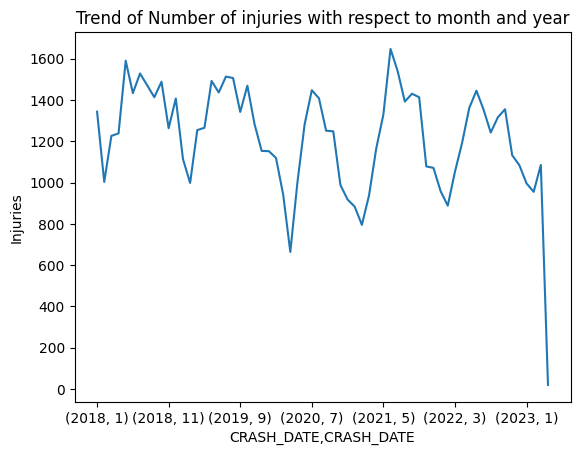

In [34]:
year_trend = pd.Series(crash_df.groupby([crash_df['CRASH_DATE'].dt.year, crash_df['CRASH_DATE'].dt.month])['INJURIES_TOTAL'].sum())
plt.title('Trend of Number of injuries with respect to month and year')
plt.xlabel('Year')
plt.ylabel('Injuries')
year_trend.plot.line()

In the above time series over months in the years, we can see a slightly more than normal dips around the years 2020-2021 which could be because of the pandemic that though the number of crashes did not reduce, there is a dip in the total number of injuries

# Exploratory Data Analysis - Team Member 3

The data after cleaning contains of columns without any NaN value and the column schemma looks like PERSON_ID (plain Text) A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).

PERSON_TYPE (Plain Text) Type of roadway user involved in crash.

CRASH_RECORD_ID (Plain Text) This number can be used to link to the same crash in the Crashes and Vehicles datasets. This number also serves as a unique ID in the Crashes dataset.

RD_NO (Plain Text) Chicago Police Department report number.

VEHICLE_ID (Plain Text) The corresponding CRASH_UNIT_ID from the Vehicles dataset.

CRASH_DATE (Date and Time) Date and time of crash as entered by the reporting officer.

CITY (Plain Text) City of residence of person involved in crash.

STATE (Plain Text) State of residence of person involved in crash.

ZIPCODE (Plain Text) ZIP Code of residence of person involved in crash.

SEX (Plain Text) Gender of person involved in crash, as determined by reporting officer.

AGE (Number) Age of person involved in crash.

SAFETY_EQUIPMENT(Plain Text)
Safety equipment used by vehicle occupant in crash, if any.

AIRBAG_DEPLOYED (Plain Text) Whether vehicle occupant airbag deployed as result of crash.

EJECTION (Plain Text) Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash.

INJURY_CLASSIFICATION (Plain Text) Severity of injury person sustained in the crash.

DRIVER_ACTION (Plain Text) Driver action that contributed to the crash, as determined by reporting officer.

DRIVER_VISION (Plain Text) What, if any, objects obscured the driver’s vision at time of crash.

PHYSICAL_CONDITION(Plain Text)
Driver’s apparent physical condition at time of crash, as observed by the reporting officer.

PEDPEDAL_ACTION (Plain Text) Action of pedestrian or cyclist at the time of crash.

By observing all the coloumns I find the corelations between the places and the number of accidents and also between safety equipment inside the car often causes more damage if it doesn't worked properly, the physical condition of the driver also plays a major role in the crash.

In [65]:
df2 = df.groupby(['CITY'])['CITY'].count()
df2=df2.sort_values(ascending=False).head(10)
print(df2)

CITY
CHICAGO         704035
CICERO           10279
SKOKIE            6781
BERWYN            5878
EVANSTON          5754
CALUMET CITY      4884
OAK LAWN          4848
OAK PARK          4079
DES PLAINES       3908
ELMWOOD PARK      3544
Name: CITY, dtype: int64


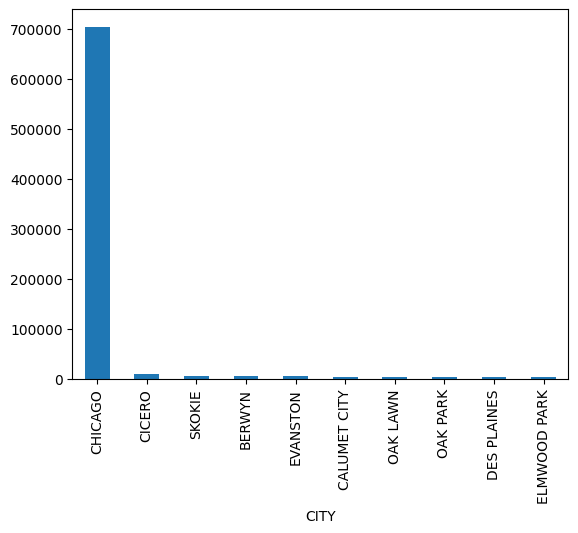

In [66]:
df2.plot.bar()
plt.show()

In [68]:
df.value_counts("PHYSICAL_CONDITION")

PHYSICAL_CONDITION
NORMAL                          857019
UNKNOWN                         122124
IMPAIRED - ALCOHOL                4545
FATIGUED/ASLEEP                   2945
REMOVED BY EMS                    2828
OTHER                             2442
EMOTIONAL                         2248
ILLNESS/FAINTED                   1008
HAD BEEN DRINKING                  598
IMPAIRED - DRUGS                   499
IMPAIRED - ALCOHOL AND DRUGS       248
MEDICATED                          126
dtype: int64

<BarContainer object of 2 artists>

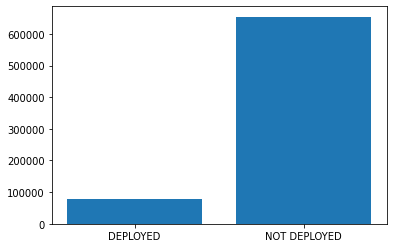

In [31]:
import matplotlib.pyplot as plt
df['AIRBAG_DEPLOYED'].unique()
airbag_count = df.groupby(['AIRBAG_DEPLOYED'])['AIRBAG_DEPLOYED'].count()
airbags_deployed_df = df[df['AIRBAG_DEPLOYED'].str.contains("DEPLOYED")]
airbags_not_deployed_df = df[df['AIRBAG_DEPLOYED'].str.contains("DID NOT DEPLOY")]


total_deployed = len(airbags_deployed_df)

total_not_deployed = len(airbags_not_deployed_df)

x_ticks = ['DEPLOYED', "NOT DEPLOYED"]
plt.bar(x_ticks, [total_deployed, total_not_deployed])

An interesting hypothethis, I would like to explain here is the realation between the city and the number of vehicle crashes, I found it's interesting because cities are usually populated and very well maintained but then a lot of accidents are happening in very well known places and it makes me think for ideas which includes data analysis to prevent as many accidents as possible.

and also During our analysis of crash data, we found that airbag deployment was closely related to the severity of crashes. Specifically, we found that crashes involving airbag deployment tended to have a lower severity score compared to crashes without airbag deployment. This suggests that airbags are effective in reducing the impact of a crash and protecting the occupants of a vehicle. However, we also noticed that the rate of airbag deployment was not consistent across all types of crashes, which may indicate that there are certain factors that influence airbag deployment, such as the speed and angle of impact. Further analysis is needed to fully understand the relationship between airbag deployment and crashes, but these initial findings suggest that airbags are an important safety feature in vehicles

# Github Link
https://github.com/CS418/group-project-seven/blob/main/team_seven_CS_418.ipynb

# References 
https://www.geeksforgeeks.org/clustering-in-machine-learning/

https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

https://pandas.pydata.org/docs/

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.line.html

https://msf894.medium.com/flatiron-school-project-3-chicago-car-crash-dataset-590c5fe0417e